In [1]:
import matplotlib.pyplot as plt
import xmltodict
import json
%matplotlib notebook

In [2]:
import os
year = 2007
os.chdir(f"/home/space/datasets/pml_deformable_convolution/VOCdevkit/VOC{year}")

def getImageList():
    with open("ImageSets/Segmentation/trainval.txt", "r") as f:
        data = f.read()
    
    return data.strip("\n").split("\n")

def getAnnotation(imageName):
    with open(f'Annotations/{imageName}.xml', 'r') as f:
        data = xmltodict.parse(f.read())
    return data

In [3]:
imageList = getImageList()

print(len(imageList), imageList[:10])

imageName = imageList[0]

422 ['000032', '000033', '000039', '000042', '000061', '000063', '000121', '000123', '000129', '000170']


In [4]:
data = getAnnotation(imageName)
print(json.dumps(data, indent=2))

{
  "annotation": {
    "folder": "VOC2007",
    "filename": "000032.jpg",
    "source": {
      "database": "The VOC2007 Database",
      "annotation": "PASCAL VOC2007",
      "image": "flickr",
      "flickrid": "311023000"
    },
    "owner": {
      "flickrid": "-hi-no-to-ri-mo-rt-al-",
      "name": "?"
    },
    "size": {
      "width": "500",
      "height": "281",
      "depth": "3"
    },
    "segmented": "1",
    "object": [
      {
        "name": "aeroplane",
        "pose": "Frontal",
        "truncated": "0",
        "difficult": "0",
        "bndbox": {
          "xmin": "104",
          "ymin": "78",
          "xmax": "375",
          "ymax": "183"
        }
      },
      {
        "name": "aeroplane",
        "pose": "Left",
        "truncated": "0",
        "difficult": "0",
        "bndbox": {
          "xmin": "133",
          "ymin": "88",
          "xmax": "197",
          "ymax": "123"
        }
      },
      {
        "name": "person",
        "pose": "Rear",

<IPython.core.display.Javascript object>


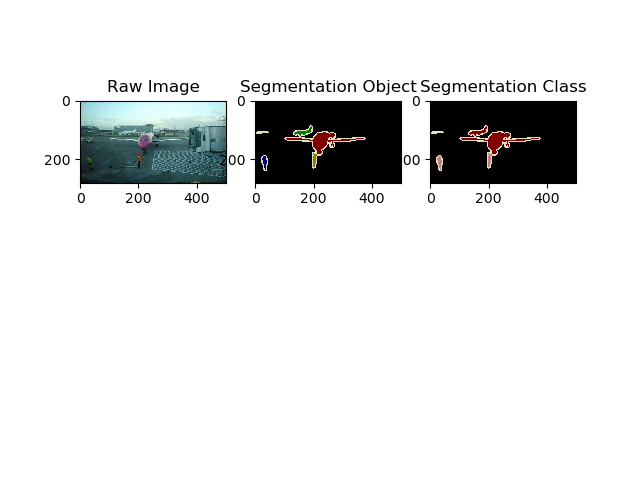

Text(0.5, 1.0, 'Segmentation Class')

In [5]:
im = plt.imread(f"JPEGImages/{imageName}.jpg")
segObject = plt.imread(f"SegmentationObject/{imageName}.png")
segClass = plt.imread(f"SegmentationClass/{imageName}.png")

plt.figure()

plt.subplot(231)
plt.imshow(im)
plt.title("Raw Image")

plt.subplot(232)
plt.imshow(segObject)
plt.title("Segmentation Object")

plt.subplot(233)
plt.imshow(segClass)
plt.title("Segmentation Class")

Unique sizes: 92 Total images: 422


<IPython.core.display.Javascript object>


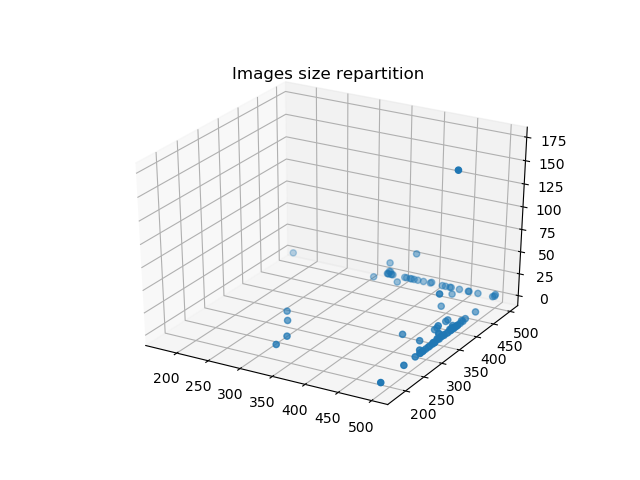

Most common sizes: 
[(('500', '375'), 173), (('500', '333'), 52), (('375', '500'), 31), (('500', '332'), 17), (('333', '500'), 14), (('500', '334'), 8), (('500', '335'), 7), (('500', '281'), 5), (('500', '374'), 5), (('334', '500'), 4)]
Number of unique depth: 1


In [6]:
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

# Compare images sizes
sizes = []
depth = []
for imageName in imageList:
    data = getAnnotation(imageName)['annotation']
    sizes.append((data['size']['width'], data["size"]['height']))
    depth.append(data['size']['depth'])

sizeUniques = list(set(sizes))
print("Unique sizes:", len(sizeUniques), "Total images:", len(imageList))

# Sizes are not unique, we need to proceed them to be acceptes by the Model
# Resize them to the same size? Pad with zeros?
x = []
y = []
z = []

mostCommon = Counter(sizes).most_common()
for (w, h), c in mostCommon:
    x.append(int(w))
    y.append(int(h))
    z.append(int(c))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
plt.title("Images size repartition")

print("Most common sizes: ")
print(mostCommon[:10])

# Depth of images
depthUnique = list(set(depth))
print(f"Number of unique depth: {len(depthUnique)}")

In [7]:
#Get different classes
classesFiles = os.listdir("ImageSets/Main")

classes = list(set([name.split("_")[0] for name in classesFiles if ".txt" not in name.split("_")[0]]))

classes

['sofa',
 'bottle',
 'diningtable',
 'dog',
 'cow',
 'boat',
 'car',
 'bicycle',
 'person',
 'horse',
 'cat',
 'motorbike',
 'tvmonitor',
 'bird',
 'pottedplant',
 'bus',
 'chair',
 'aeroplane',
 'sheep',
 'train']

In [23]:
def show(images, output = None):
    # Show images by file names
    # images: array, contains file names to show
    
    cols = 2
    tot = len(images)
    rows = tot // cols
    rows += 1 if tot % cols != 0 else 0
    
    _, axs = plt.subplots(rows, cols, figsize = (8,8))
    axs = axs.flatten()
    
    for img, ax in zip(images, axs):
        im = plt.imread(f"JPEGImages/{img}.jpg")
        segObject = plt.imread(f"SegmentationObject/{img}.png")
        
        ax.imshow(im)
        ax.imshow(segObject, alpha=0.5)
        
    if output != None:
        plt.savefig("/home/pml_06/fig_output/" + output + ".png", format="png")

<IPython.core.display.Javascript object>


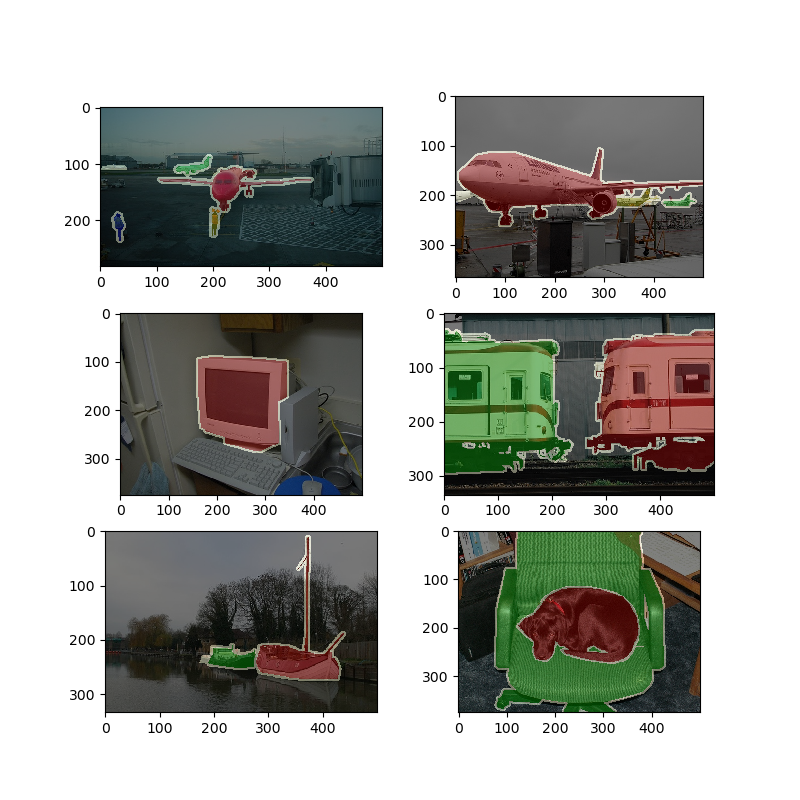

FileNotFoundError: [Errno 2] No such file or directory: '/home/pml_06/fig_output/test2.png'

In [24]:
show(imageList[0:6], output="test2")